<a href="https://colab.research.google.com/github/abhinabasaha/Stock_Price_Prediction_By_LSTM/blob/master/Google_Stock_Price_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Mounting Google Co-laboratory

from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Importing necessary Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#Loading dataset

dataset_train = pd.read_csv("/content/drive/My Drive/DeepLearning/RNN_with_Keras/Google_Stock_Price_Train.csv")

In [0]:
#Structure of the dataset
#Here I will be using only the Opening price of each day(from 2012 to 2016) to train the model

dataset_train.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
#Taking the Opening stock price data in the training dataset

training_set = dataset_train.iloc[:, 1:2].values



Visualizing the Data using MATPLOTLIB (Date vs Opening Stock price)

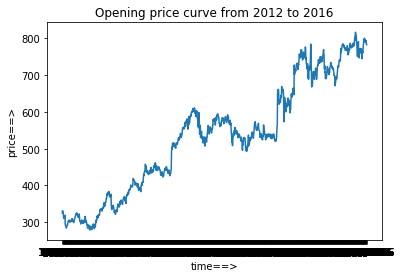

In [0]:
#Plotting the opening stock price from 2012 to 2016

price=np.array(training_set)

time=dataset_train.iloc[:, 0:1].values
years=np.array(time)


x=years[:,0]
y=price[:,0]

plt.plot(x,y)
plt.title('Opening price curve from 2012 to 2016')
plt.xlabel('TIME==>')
plt.ylabel('PRICE==>')
plt.show()


FEATURE SCALING

Feature scaling is done to scale the data in order to achieve better convergence and learning.

1.   Standardisation:     (x-mean(x))/(standard daviation(x))

2.   Normalisation:         (x-min(x))/(max(x)-min(x))

Here I will be using normalization because in the output layer sigmoid curve will be used as activation function.



In [0]:
#Here I will be using Normalization using the scikit-learn library.

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 timesteps and 1 output: 60 previous observations are considered to predict the current stock price

X_train = []   #Initialize training data
y_train = []   #Initialize testing data

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping the training data to get 3D Dimentionality with one indicator

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
# Initialising the RNN (Since predicting a continuous value, hence using regressor)

regressor = Sequential()

In [0]:
# Adding the first LSTM layer and some Dropout regularisation to reduce overfitting and improve generalization error

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [0]:
# Adding a second LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a third LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a fourth LSTM layer and some Dropout regularisation (no return sequence since it is the last layer)

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
# Adding the output layer (a fully connected layer using the Dense class) with single output

regressor.add(Dense(units = 1))

In [0]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
# Fitting the RNN to the Training set

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0629
Epoch 2/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0075
Epoch 3/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0058
Epoch 6/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0054
Epoch 7/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0056
Epoch 8/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0057
Epoch 10/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0050
Epoch 12/100
1198/1198 [============================

Making the predictions and visualizing the results.

In [0]:
# Getting the real stock price of 2017

dataset_test = pd.read_csv("/content/drive/My Drive/DeepLearning/RNN_with_Keras/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

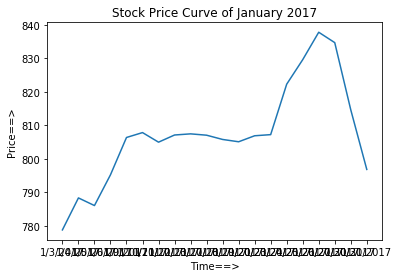

In [0]:
#Visualizing the Stock Price Curve of January 2017
rsp=np.array(real_stock_price)
T=dataset_test.iloc[:, 0:1].values

a=rsp[:,0]
b=T[:,0]

plt.plot(b,a)
plt.title("Stock Price Curve of January 2017")
plt.xlabel('Time==>')
plt.ylabel('Price==>')
plt.show()


In [0]:
# Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

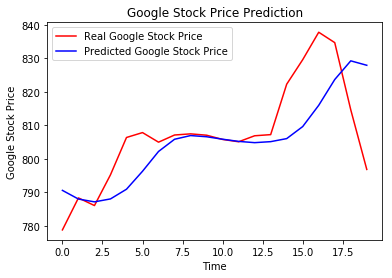

In [0]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()